In [1]:
from tbdynamics.inputs import matrix, conmat
from tbdynamics.constants import age_strata
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

# Plotting matrices

## Matrix comes from socialmixr package

In [8]:
def plot_contact_matrix(contact_matrix, age_groups, title):
    """
    Plots a contact matrix with the given age groups as labels.

    Args:
    - contact_matrix: A 2D numpy array representing the contact rates between age groups.
    - age_groups: A list of strings representing the labels for the age groups.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(contact_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': ''},
                xticklabels=age_groups, yticklabels=age_groups)

    plt.xlabel("Age Group")
    plt.ylabel("Age Group")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.gca().invert_yaxis()
    plt.show()

**Explaination**: The **contact_matrix** function in R facilitates the creation of contact matrices from survey data of Horby 2005 (semi-rural setting), offering capabilities for age group customization, age-based weighting, and the application of various filters to enhance the analysis. It processes survey data from Vietnam with specified age brackets (0, 5, 15, 35, 50, 70) and employs age weighting (weigh.age = TRUE), accounting for the age distribution of the Vietnamese population and calculating the average number of daily contacts for each age category. The age distribution is aligned with Vietnam's population as of 2020.
Given that Horby's original dataset includes only age groups rather than the precise ages of participants, this process attempts to assign a specific age within each age group and conducts bootstrap sampling a thousand times (n = 1000), averaging the results from these samples.
The outcome is a total count of daily contact matrix for all locations. To obtain the ultimate results, each matrix value has been scaled up by a factor of 365.25.

## Matrix comes from conmat package

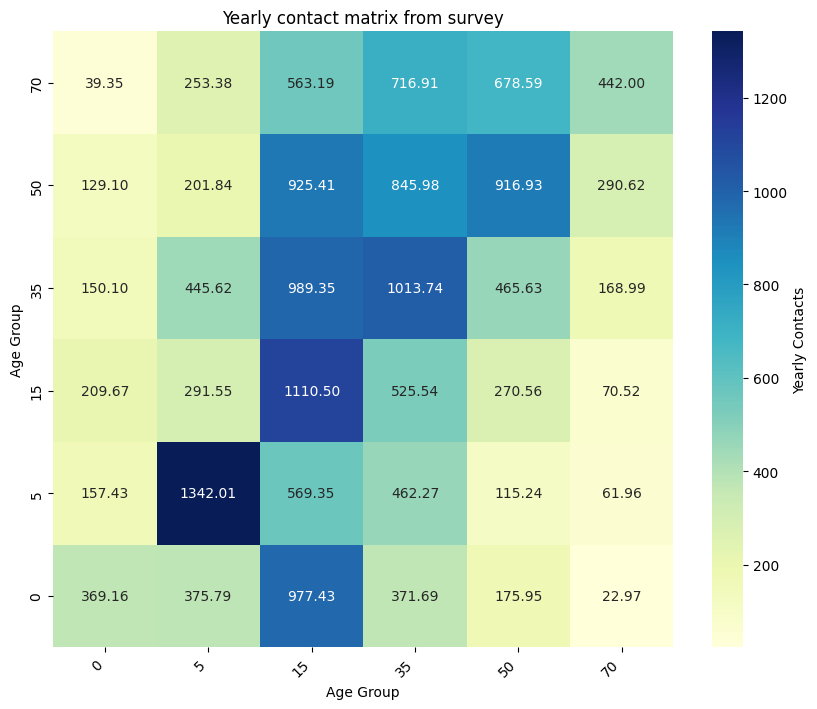

In [3]:
plot_contact_matrix(matrix, age_strata, "Yearly contact matrix from survey")

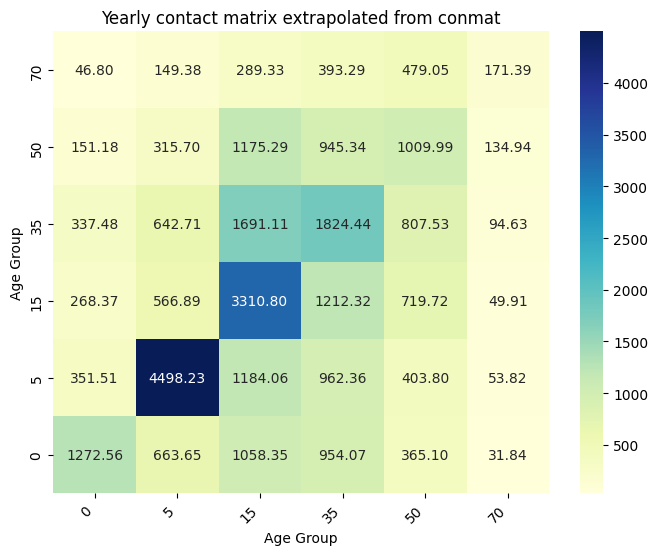

In [9]:
plot_contact_matrix(conmat, age_strata, "Yearly contact matrix extrapolated from conmat")

The **conmat package** utilizes data from **polymod** to extend and generate a contact matrix tailored to the Vietnamese population in 2020, employing Generalized Additive Models (GAM). The outcome is a total count of daily contact matrix of all locations. To achieve the final product, each value in the matrix was multiplied by 365.25.

## Calculate the differene using Canberra method

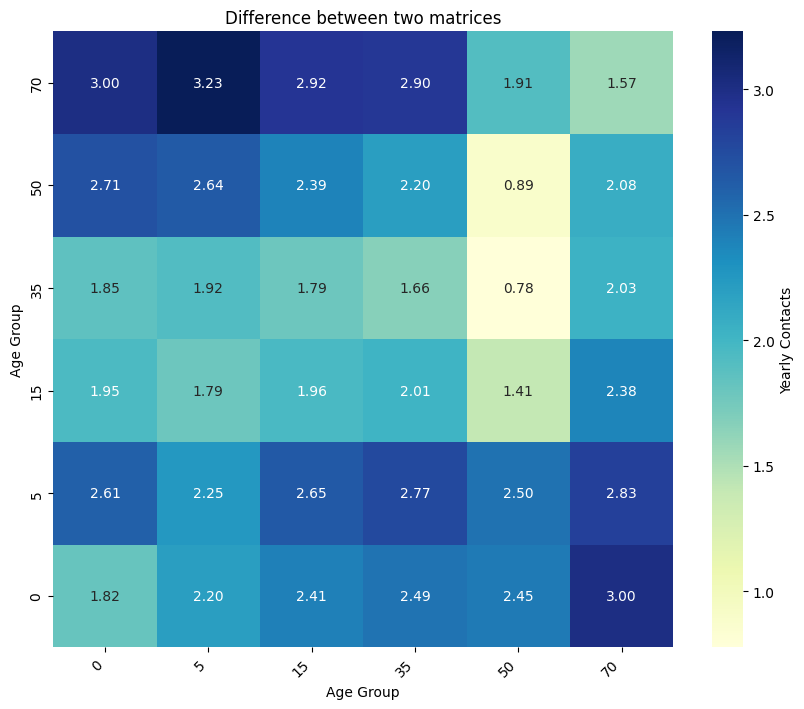

In [5]:
# Calculate Canberra distances between corresponding rows in 'values' and 'conmat_values'
distance_matrix = cdist(matrix, conmat, metric='canberra')
plot_contact_matrix(distance_matrix, age_strata, "Difference between two matrices")